# Part 1: Filter Out Useless Comments

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import spacy as sp
from spacy.lang.en import English
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt

# a) Choose Datasets & Build Dataframes

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
toxic_corpus = pd.read_csv('Total_toxicity.csv')

In [3]:
train = train[train['target']>0.7] #之后用全部的
#train = train[:2000]
#train[:5]
#len(train)

In [4]:
#判断句子长度，或者数单词数量
new_data = []

for i in train.comment_text:
    i_small = i.lower() #改为小写

    i_small = re.sub(r'[!@#$%^&*(_+)-={}:;"",.<.>/?\|"… - ]', ' ', i_small) #去除标点

    word_tokens = word_tokenize(i_small)
    length = len(word_tokens)
    sentence = nltk.sent_tokenize(i) #句子分开
    num_sentence = len(sentence)
    #print(sentence)
    #每一句话 一列：sentence1，sentence2...
    new_data.append((i,word_tokens,length,sentence,num_sentence))
    
#新的 dataframe 包含 句子长度
train_1 = pd.DataFrame(new_data, columns = ['text','comment_tokens' , 'num_of_token', "sentence","number_of_sentence"], index = train.id) 
train_1[:5]

,text,comment_tokens,num_of_token,sentence,number_of_sentence
id,,,,,
59856,haha you guys are a bunch of losers.,"[haha, you, guys, are, a, bunch, of, losers]",8,[haha you guys are a bunch of losers.],1
239607,Yet call out all Muslims for the acts of a few...,"[yet, call, out, all, muslims, for, the, acts,...",40,[Yet call out all Muslims for the acts of a fe...,3
239612,This bitch is nuts. Who would read a book by a...,"[this, bitch, is, nuts, who, would, read, a, b...",12,"[This bitch is nuts., Who would read a book by...",2
240311,You're an idiot.,"[you, 're, an, idiot]",4,[You're an idiot.],1
240329,Who cares!? Stark trek and Star Wars fans are ...,"[who, cares, stark, trek, and, star, wars, fan...",15,"[Who cares!?, Stark trek and Star Wars fans ar...",2


In [5]:
#判断是否是脏评论
if_toxic = []
num_toxic_word = []
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
  
toxic_word_in_comment = []  
for x in train_1.comment_tokens:
    toxic_word_each = []
    a = list(x)
    b = list(toxic_corpus.Toxic_word)
    c = intersection(a,b) 
    num_toxic_word.append(len(c))
    if len(c)>0:
        if_toxic.append(1)
        toxic_word_each.append(c)
    else: 
        if_toxic.append(0)
    toxic_word_in_comment.append(toxic_word_each)
        

train_1['toxic_word_in_comment'] = toxic_word_in_comment
train_1["if_toxic"] = if_toxic
train_1['num_toxic_word'] = num_toxic_word

train_1 = train_1[train_1["if_toxic"]==1] #确定这里面含有脏词的comment


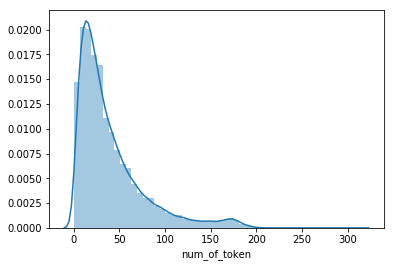

In [6]:
#句子长度 和 句子个数 distribution图
sns.distplot(train_1.num_of_token);

In [7]:
#判断是否每一句都中有脏词
sentence_include_toxic_word = [] #每一个comment里面，哪几个句子有toxic

toxic_word = []

one_zero_structure = [] #可以通过这个看101010结构

for x in train_1.sentence:
    length = len(x)
    
    toxic_sentence = []
    
    toxic_word_in_sentence = []
    
    one_zero = []
    
    for i in range(length):
        sentence = x[i]
        
        sentence = sentence.lower()#小写
        sentence = re.sub(r'[!@#$%^&*(_+)-={}:;"",.<.>/?\|"… - ]', ' ', sentence) #去除标点
        
        a = word_tokenize(sentence)
        b = list(toxic_corpus.Toxic_word)
        c = intersection(a,b) 
        if len(c)>0:
            toxic_sentence.append(i)
            toxic_word_in_sentence.append(c)
            one_zero.append(1)
        else:
            one_zero.append(0)
            
            
    sentence_include_toxic_word.append(toxic_sentence)
    toxic_word.append(toxic_word_in_sentence)
    one_zero_structure.append(one_zero)
    

train_1['toxic_sentence'] = sentence_include_toxic_word
train_1['toxic_word'] = toxic_word
train_1['one_zero_structure'] = one_zero_structure

#有几句toxic
num_toxic = []
for i in train_1.toxic_sentence:
    num_toxic.append(len(i))    
train_1['num_toxic_sentcence'] = num_toxic

train_1[:5]


,text,comment_tokens,num_of_token,sentence,number_of_sentence,toxic_word_in_comment,if_toxic,num_toxic_word,toxic_sentence,toxic_word,one_zero_structure,num_toxic_sentcence
id,,,,,,,,,,,,
239607,Yet call out all Muslims for the acts of a few...,"[yet, call, out, all, muslims, for, the, acts,...",40,[Yet call out all Muslims for the acts of a fe...,3,[[idiots]],1,1,[1],[[idiots]],"[0, 1, 0]",1
239612,This bitch is nuts. Who would read a book by a...,"[this, bitch, is, nuts, who, would, read, a, b...",12,"[This bitch is nuts., Who would read a book by...",2,[[bitch]],1,1,[0],[[bitch]],"[1, 0]",1
240311,You're an idiot.,"[you, 're, an, idiot]",4,[You're an idiot.],1,[[idiot]],1,1,[0],[[idiot]],[1],1
240424,"Sorry to have to do this, but just to see if p...","[sorry, to, have, to, do, this, but, just, to,...",16,"[Sorry to have to do this, but just to see if ...",1,[[fuck]],1,1,[0],[[fuck]],[1],1
240450,THIS IS A TEST: \n\nAny fool knows Star Trek i...,"[this, is, a, test, any, fool, knows, star, tr...",43,[THIS IS A TEST: \n\nAny fool knows Star Trek ...,3,"[[fool, crap, crap]]",1,3,"[0, 1, 2]","[[fool], [crap], [crap]]","[1, 1, 1]",3


In [8]:
print(len(list(train_1.text)))

33872


# b) Filter by Number of Tokens in a Comment

In [9]:
#comment字数大于6小于100，字数少于8个字的句子，基本都是骂人的话
train_2 = train_1[train_1['num_of_token']>8] 
#train_2 = train_2[train_2['num_of_token']<100]  

In [10]:
short = train_1[train_1['num_of_token']<8] 
short.to_csv('short_toxic.csv',index=False)

In [11]:
print(len(list(train_2.text)))

30138


# c) Filter by Sentence Fractions for Multi-Sentence Comments

/Users/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


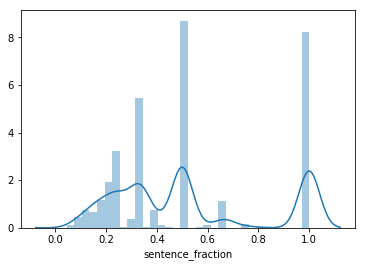

In [12]:
#脏句数/总共句数
train_2['sentence_fraction'] = train_2.num_toxic_sentcence/train_2.number_of_sentence
#脏词数/总共词数
train_2['token_fraction'] = train_2.num_toxic_word/train_2.num_of_token

#查看distribution
sns.distplot(train_2.sentence_fraction);


In [13]:
#用来看反例的
#对于多句子的comment来说，sentence fraction大于0.7意味着十句话有7句有脏词
train7 = train_2[train_2.sentence_fraction > 0.7] #至少sentence fraction是0.7
train7 = train7[train7.number_of_sentence > 2]#至少两句话，算是multi-sentence comments

In [14]:
train7.to_csv('multi_sentence.csv',index=False)

In [15]:
#在大于三句话的comment中，除去sentence_fraction>0.66的

drop_sentence = []
#create new data for 三句话
k1 = list(train_2.index)

for i in k1:
    if list(train_2[train_2.index==i].sentence_fraction)[0] > 0.66 and list(train_2[train_2.index==i].number_of_sentence)[0] > 2:
        drop_sentence.append(i)


train_2 = train_2.drop(drop_sentence)
        
#for i in drop_sentence: #返回原来数据，drop大于三句且sentence_fraction>0.66

#    train_2.drop(train_2.index[i])


In [16]:
#list(train_2[train_2.index==239607].text)[0]

In [17]:
#retrieving rows by iloc method 这些是被drop掉的
#dataFrame.loc[<ROWS RANGE> , <COLUMNS RANGE>]
#train_2.iloc[drop_sentence]

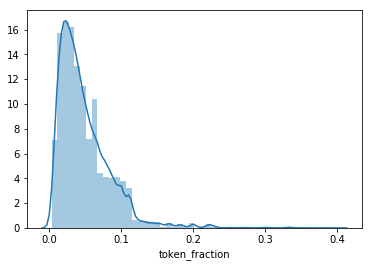

In [18]:
sns.distplot(train_2.token_fraction)

In [19]:
print(len(list(train_2.text)))

28768


# d) Filter by Token Fraction in a Comment

In [20]:
train8 = train_2[train_2.token_fraction > 0.09]
train8.to_csv('many_toxic_words.csv',index=False)

In [21]:
#对于token fraction来说，100个单词里有9个脏词，属于太多了
train_2 = train_2[train_2.token_fraction < 0.09]
train_2

,text,comment_tokens,num_of_token,sentence,number_of_sentence,toxic_word_in_comment,if_toxic,num_toxic_word,toxic_sentence,toxic_word,one_zero_structure,num_toxic_sentcence,sentence_fraction,token_fraction
id,,,,,,,,,,,,,,
239607,Yet call out all Muslims for the acts of a few...,"[yet, call, out, all, muslims, for, the, acts,...",40,[Yet call out all Muslims for the acts of a fe...,3,[[idiots]],1,1,[1],[[idiots]],"[0, 1, 0]",1,0.333333,0.025000
239612,This bitch is nuts. Who would read a book by a...,"[this, bitch, is, nuts, who, would, read, a, b...",12,"[This bitch is nuts., Who would read a book by...",2,[[bitch]],1,1,[0],[[bitch]],"[1, 0]",1,0.500000,0.083333
240424,"Sorry to have to do this, but just to see if p...","[sorry, to, have, to, do, this, but, just, to,...",16,"[Sorry to have to do this, but just to see if ...",1,[[fuck]],1,1,[0],[[fuck]],[1],1,1.000000,0.062500
240615,"Well shit, they drafted a guide. We should al...","[well, shit, they, drafted, a, guide, we, shou...",16,"[Well shit, they drafted a guide., We should a...",2,[[shit]],1,1,[0],[[shit]],"[1, 0]",1,0.500000,0.062500
240879,"""Real freedom""? Freedom to kill wantonly when ...","[real, freedom, freedom, to, kill, wantonly, w...",60,"[""Real freedom""?, Freedom to kill wantonly whe...",5,"[[assholes, scum]]",1,2,"[2, 4]","[[assholes], [scum]]","[0, 0, 1, 0, 1]",2,0.400000,0.033333
240941,I honestly cannot decide if these guys are com...,"[i, honestly, can, not, decide, if, these, guy...",25,[I honestly cannot decide if these guys are co...,1,[[morons]],1,1,[0],[[morons]],[1],1,1.000000,0.040000
240944,There will always be idiots doing something st...,"[there, will, always, be, idiots, doing, somet...",43,[There will always be idiots doing something s...,4,"[[idiots, stupid]]",1,2,[0],"[[idiots, stupid]]","[1, 0, 0, 0]",1,0.250000,0.046512
240961,Where do you get the Sour Grapes to say this i...,"[where, do, you, get, the, sour, grapes, to, s...",34,[Where do you get the Sour Grapes to say this ...,2,[[crap]],1,1,[1],[[crap]],"[0, 1]",1,0.500000,0.029412
241144,"After watching that video, it is lucky more pe...","[after, watching, that, video, it, is, lucky, ...",60,"[After watching that video, it is lucky more p...",4,[[idiot]],1,1,[3],[[idiot]],"[0, 0, 0, 1]",1,0.250000,0.016667


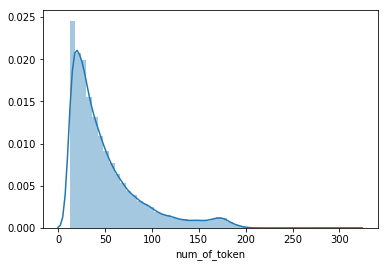

In [22]:
sns.distplot(train_2.num_of_token)

In [23]:
#一开始认为一定有用的，超过100个单词的comment，需要进一步分析么？
#train_3 = train_1[train_1['num_of_token']>99]

In [24]:
#没有少于8个字，没有两句以上大于0.66，没有大于0.09的
#train_2.to_csv('useful_comment.csv',index=False)

In [25]:
print(len(list(train_2.text)))

25163


# Part 2: Filter Out Useless Sentences

In [26]:
#参考 spacy sp.load("en_core_web_sm") 的内容
#for token in doc:
#    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#            token.shape_, token.is_alpha, token.is_stop)

In [61]:
#每一个句子中，包含脏词的句子，如果短于8个单词，一样属于只有骂人的句子，所以需要删除
#用spacy加载nlp文件
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.tokens import Doc
import numpy
def remove_span(doc, index): #用来去除句子中的标点的
    np_array = doc.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA])
    np_array_2 = numpy.delete(np_array, (index), axis = 0)
    doc2 = Doc(doc.vocab, words=[t.text for i, t in enumerate(doc) if i!=index])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array_2)
    return doc2

nlp = sp.load("en_core_web_sm")
sentence_larger_8 = [] #这个集合只有大于8个词的句子
sentence_smaller_8 = []
number_of_sentence = 0 #计算总共有用的句子数量
for i in list(train_2.sentence):
    temp1 = [] #一个comment中的句子
    temp2 = []
    for j in i: #comment中的句子
        #t = nlp(j) #句子tokenize
        #for position in range(len(t)): #去除标点
            #if t[position].pos_ == 'PUNCT':
                #remove_span(t, position)
        f = j.lower() #改为小写
        f = re.sub(r'[!@#$%^&*(_+)-={}:;"",.<.>/?\|"… - ]', ' ', f) #去除标点
        f = word_tokenize(f)
        have_toxic_word = intersection(f,list(toxic_corpus.Toxic_word))
        #print(len(have_toxic_word))
        if len(f) < 8 and len(have_toxic_word)>0:
            temp2.append(j)
        else:
            temp1.append(j)
            number_of_sentence+=1
    sentence_larger_8.append(temp1)
    sentence_smaller_8.append(temp2)

In [62]:
len(sentence_larger_8) == len(sentence_smaller_8) #确认长度一样，每一个comment里都有东西

True

In [64]:
#展示删除句子
short_sentences = pd.DataFrame(list(zip(list(train_2.text),sentence_smaller_8)),columns = ['text','sentence_smaller_8'])
short_sentences = short_sentences[short_sentences.sentence_smaller_8.apply(len) > 0]
short_sentences.to_csv('short_sentences.csv',index=False)

In [65]:
# 把list换成一体的text,注意有可能产生空的
text_useful_sentence =[]
for i in sentence_larger_8:
    text_useful_sentence.append(" ".join(i))

In [66]:
#存档点
train_2['text_useful_sentence'] = text_useful_sentence
train_2 = train_2[train_2.text_useful_sentence.notnull()] #去除有null部分
train_2.to_csv('useful_comment.csv',index=False)


# Part 3: Find Constructive Verbs

In [67]:
#基于有用句子，总结动词按照频率看，去掉stopword
nlp = sp.load("en_core_web_sm")
verb = []
for x in train_2.text_useful_sentence:
    #print(x)
    t = nlp(x)
    for token in t:
        toxic_list = list(toxic_corpus.Toxic_word)
        if token.is_stop == False and token.pos_ == 'VERB' and token.text not in toxic_list:
            verb.append(token.lemma_) #动词原形进入list

In [68]:
#print(verb)
from collections import Counter
c = Counter(verb)

words = []
frequency = []
for i in c:
    words.append(i)
    j = str(i)
    frequency.append(c[j])

#c.most_common(70)

In [69]:
df_verb = pd.DataFrame(list(zip(words, frequency)),columns =['verb_vocab', 'frequency']) 
df_verb.set_index("verb_vocab",drop=True,inplace=True)
df_verb[:10]

sort_df_verb = df_verb.sort_values('frequency',ascending=False)
print(sort_df_verb[:100])

            frequency
verb_vocab           
think            3194
know             2999
go               2299
want             2121
say              2091
need             1871
get              1739
come             1633
look             1442
try              1435
pay              1333
vote             1295
make             1162
let              1141
tell             1097
believe          1085
work              964
call              947
take              913
live              903
stop              882
read              850
kill              831
run               807
leave             805
mean              789
give              750
find              736
lose              729
support           705
...               ...
drive             365
realize           359
learn             348
expect            345
fail              343
grow              342
act               340
sell              336
end               334
throw             329
hold              323
save              315
claim     

In [70]:
sort_df_verb.reset_index(level=0, inplace=True)
print(sort_df_verb.index)

RangeIndex(start=0, stop=5355, step=1)


In [72]:
print(len(sort_df_verb)) #一共5136个单词
print(number_of_sentence) #64658个有用句子

5355
84503


In [73]:
#把verb_vocab设为index，以便于画图
sort_df_verb.set_index("verb_vocab",drop=True,inplace=True)
sort_df_verb.index

Index(['think', 'know', 'go', 'want', 'say', 'need', 'get', 'come', 'look',
       'try',
       ...
       'lowbid', 'spender', 'chicken', 'ge', 'yes-', 'unthinke', 'dignify',
       'mollycoddle', 'interste', 'democrat'],
      dtype='object', name='verb_vocab', length=5355)

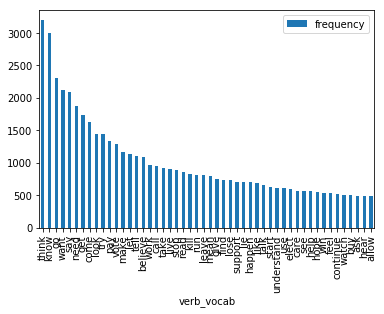

In [74]:
#print(df_verb.index.values)
sort_df_verb[:50].plot(kind='bar') #可以看出frequency大于1000次的算出现频率高的

1. 64658个有用句子包含constructive verb的这些句子，取出来作为结果呈现
2. 假设我们现在filter出来的这些comment大多数都是有用的，如果从这些comment提取动词，那么出现频率最高的动词（除了be动词）就是有用的动词或者说有建设性comment的动词。
3. 找到这些动词后再返回去过滤，包含这些动词的句子挑出来。
4. train_2['text_useful_sentence'] tokenzie一下找动词

In [75]:
#出现频率超过一千次的verb
list_1000 = sort_df_verb #[sort_df_verb.frequency>100]
list_1000.reset_index(level=0, inplace=True)

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
list_1000_verb = [w for w in list(list_1000.verb_vocab) if not w in stop_words] 
list_1000_verb = list(list_1000.verb_vocab)

In [76]:
list(list_1000.verb_vocab)

['think',
 'know',
 'go',
 'want',
 'say',
 'need',
 'get',
 'come',
 'look',
 'try',
 'pay',
 'vote',
 'make',
 'let',
 'tell',
 'believe',
 'work',
 'call',
 'take',
 'live',
 'stop',
 'read',
 'kill',
 'run',
 'leave',
 'mean',
 'give',
 'find',
 'lose',
 'support',
 'lie',
 'happen',
 'like',
 'talk',
 'start',
 'understand',
 'use',
 'elect',
 'care',
 'see',
 'help',
 'hope',
 'win',
 'feel',
 'continue',
 'watch',
 'buy',
 'ask',
 'hear',
 'allow',
 'play',
 'write',
 'show',
 'agree',
 'prove',
 'stand',
 'love',
 'bring',
 'hate',
 'speak',
 'change',
 'spend',
 'turn',
 'guess',
 'shoot',
 'have',
 'blame',
 'post',
 'wait',
 'die',
 'drive',
 'realize',
 'learn',
 'expect',
 'fail',
 'grow',
 'act',
 'sell',
 'end',
 'throw',
 'hold',
 'save',
 'claim',
 'protect',
 'destroy',
 'deserve',
 'include',
 'base',
 'create',
 'sound',
 'follow',
 'pass',
 'send',
 'ignore',
 'defend',
 'fix',
 'build',
 'consider',
 'remember',
 'cut',
 'fire',
 'lead',
 'serve',
 'wonder',
 'cho

In [77]:
express_opinion ='think feel guess view mean say accept believe suppose concern agree convince get disagree doubt'
word_tokenize(express_opinion)
suggestion_verb = ["consider","accept","point","see","disagree","agree","mean","feel","suggest","propose", "recommend", 
                   "theorize", "advise", "hypothesize", "indicate", "denote", "think", "advocate", "convince","doubt",
                   "speculate", "propound", "conjecture", "evoke", "move", "express", "suppose", "counsel", "connote", "represent", 
                   "infer", "manifest", "conceive", "demonstrate", "illustrate", "convey", "guess", "postulate", "insinuate", 
                   "signify", "evince", "encourage", "table", "submit", "philosophise", "show", "reveal", "posit", "imply", 
                   "impart", "hint", "insinuate", "philosophize", "express", "imagine", "surmise", "signify", "infer", 
                   "allude", "advance", "intimate"]
w = suggestion_verb + word_tokenize(express_opinion)
suggestion_verbs = list(dict.fromkeys(w))
list_1000_verb = intersection(suggestion_verbs,list(list_1000.verb_vocab))

In [89]:
#short_sentences = pd.DataFrame(list(zip(list(train_2.text),sentence_smaller_8)),columns = ['text','sentence_smaller_8'])

verb_list = pd.DataFrame(list_1000_verb)
verb_list.to_csv('verb_list.csv',index=False)
list_1000_verb

['consider',
 'accept',
 'point',
 'see',
 'disagree',
 'agree',
 'mean',
 'feel',
 'suggest',
 'propose',
 'recommend',
 'advise',
 'indicate',
 'denote',
 'think',
 'advocate',
 'convince',
 'doubt',
 'speculate',
 'propound',
 'move',
 'express',
 'suppose',
 'counsel',
 'represent',
 'infer',
 'manifest',
 'conceive',
 'demonstrate',
 'illustrate',
 'convey',
 'guess',
 'postulate',
 'insinuate',
 'signify',
 'encourage',
 'table',
 'submit',
 'show',
 'reveal',
 'imply',
 'hint',
 'imagine',
 'surmise',
 'allude',
 'advance',
 'view',
 'say',
 'believe',
 'concern',
 'get']

In [79]:
train_2 = pd.read_csv('useful_comment.csv')
train_2 = train_2[train_2.text_useful_sentence.notnull()]

In [80]:
useful_sentence = []
does_have_useful_sentence = []
for i in list(train_2.text_useful_sentence):
    #sentence tokenize
    sentences = nltk.sent_tokenize(i)

    useful_sentence_of_each = []

    
    
    #保证这句话不是最短的一句
    length = []
    temp = []
    for j in sentences:
        
        i_small = i.lower() #改为小写
        i_small = re.sub(r'[!@#$%^&*(_+)-={}:;"",.<.>/?\|"… - ]', ' ', i_small) #去除标点
        t = word_tokenize(i_small)
        length.append(len(t))
    
        contain_verb = intersection(list(t),list_1000_verb)
        not_contain_curse = intersection(list(t),list(toxic_corpus.Toxic_word)) #没有脏字
        
        if len(contain_verb)>0 and len(not_contain_curse) == 0: #如果这句话有verb，那么加入新的column
            temp.append(j)
            
    for j in temp:
        if len(j)>min(length):#不是最短的一句
            useful_sentence_of_each.append(j)
    
    if len(useful_sentence_of_each)>0:
        does_have_useful_sentence.append(1)
    else:
        does_have_useful_sentence.append(0)
    

    useful_sentence.append(useful_sentence_of_each) 

In [81]:
train_2['useful_sentence'] =useful_sentence
train_2['does_have_useful_sentence'] =does_have_useful_sentence

In [82]:
final = train_2[train_2.does_have_useful_sentence > 0]
final_dataframe = pd.concat([final.text,final.toxic_word,final.useful_sentence], axis=1)

In [83]:
final_dataframe.to_csv('final_dataframe.csv',index=False)

In [84]:
final.to_csv('final_full_data.csv',index=False)